# PROBLEM 1

Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals [SalaryData.csv] are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.

[Assume that the data follows a normal distribution. In reality, the normality assumption may not always hold if the sample size is small.]

State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.
Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.
Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.
If the null hypothesis is rejected in either (2) or in (3), find out which class means are significantly different. Interpret the result. (Non-Graded)

In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [144]:
df = pd.read_csv('SalaryData.csv')

In [145]:
df.head(10)

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769
5,Doctorate,Sales,219420
6,Doctorate,Sales,237920
7,Doctorate,Sales,160540
8,Doctorate,Sales,180934
9,Doctorate,Prof-specialty,248156


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [147]:
df.shape

(40, 3)

In [148]:
df.Education.value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

In [149]:
df.Occupation.value_counts()

 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64

In [150]:
df.describe()

,Salary
count,40.000000
mean,162186.875000
std,64860.407506
min,50103.000000
25%,99897.500000
50%,169100.000000
75%,214440.750000
max,260151.000000


# 1.1 State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

## One way ANOVA for Education

Education has three levels Doctorate, Bachelors & HS-grad.Let us assume the population means to be µ1, µ2, µ3 respectively.

H0 : 𝜇1 = 𝜇2 = 𝜇3 The mean salary is same across all levels of education

H1 : For atleast one pair of education level, the mean salary is different

## One way ANOVA for Occupation

Occupation has four levels Prof-specialty, Sales, Adm-clerical, Exec-managerial. Let us assume the population means to be µ1, µ2, µ3, µ4 respectively.

H0 : 𝜇1 = 𝜇2 = 𝜇3 = µ4 The mean salary is same across all levels of occupation.

H1 : For atleast one pair of occupation level, the mean salary is different.

# 1.2 Perform one-way ANOVA for Education with respect to the variable ‘Salary’. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [151]:
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA

In [152]:
#Converting the Education & Occupation columns to categorical data type

In [153]:
df.Education = pd.Categorical(df.Education)

In [154]:
#Checking if it got converted
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Education   40 non-null     category
 1   Occupation  40 non-null     object  
 2   Salary      40 non-null     int64   
dtypes: category(1), int64(1), object(1)
memory usage: 940.0+ bytes


In [155]:
formula = 'Salary ~ C(Education)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


### Conclusion

Since the p-value is less than 0.05, we reject the null hypothesis
So for atleast 1 pair of education level, the mean salary differs

# 1.3 Perform one-way ANOVA for variable Occupation with respect to the variable ‘Salary’. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [156]:
formula = 'Salary ~ C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


### Conclusion 

Since the p-value is greater than 0.05, we fail to reject the null hypothesis
Across all levels of occupation, the mean salary is same

# 1.4 If the null hypothesis is rejected in either (1.2) or in (1.3), find out which class means are significantly different. Interpret the result.

Since the null hypothesis is rejected in 1.2, we perform Tukey's Multi comparison test to find out which education level has significantly different mean salary

### 𝐻0: All pairs of group means are equal

### 𝐻𝑎: At least one group mean is different from 
the rest.

In this case, as there are only 3 pairs to be considered, we may write the null and alternative 
hypothesis as:


### 𝐻0: 𝜇1 = 𝜇2 and 𝜇1 = 𝜇3 and 𝜇2 = 𝜇3 

### 𝐻𝑎: 𝜇1 ≠ 𝜇2 or 𝜇1 ≠ 𝜇3 or 𝜇2 ≠ 𝜇3

respectively, where 𝜇1 represents mean salary when education type is Doctorate, 𝜇2 represents 
mean salary when education type is Bachelors and 𝜇3 is the same for HS-Grad.

In [178]:
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd

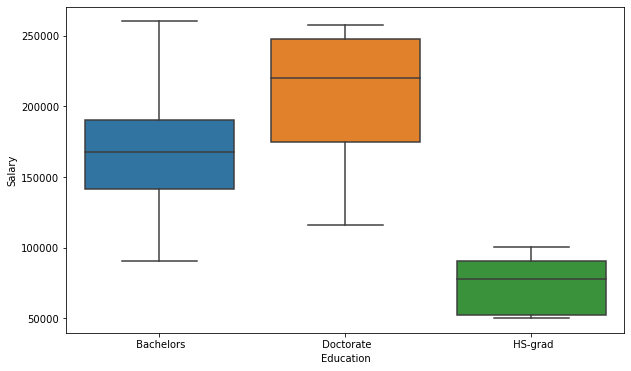

In [185]:
# Getting insights from the boxplot on mean salary across Education levels
plt.figure(figsize=(10,6))
sns.boxplot(x=df.Education,y=df.Salary)
plt.show()

In [19]:
# Performing Tukey HSD Test
MultiComp = MultiComparison(df.Salary,df.Education)
result = MultiComp.tukeyhsd()
print(result)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------------
 Bachelors  Doctorate   43274.0667 0.0146    7541.1439  79006.9894   True
 Bachelors    HS-grad  -90114.1556  0.001 -132035.1958 -48193.1153   True
 Doctorate    HS-grad -133388.2222  0.001 -174815.0876 -91961.3569   True
-------------------------------------------------------------------------


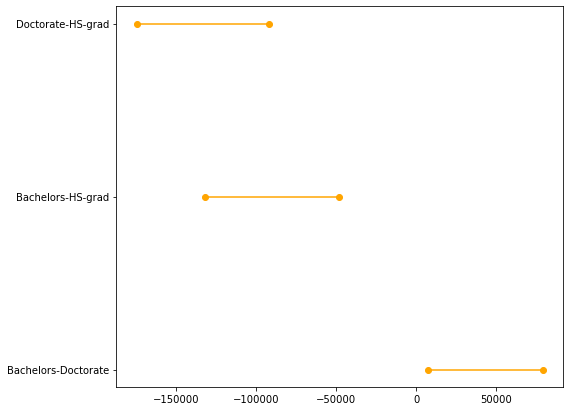

In [20]:
results = MultiComp.tukeyhsd()
df1=results.summary()
results_as_html = df1.as_html()
df2=pd.read_html(results_as_html, header=0, index_col=0)[0].reset_index()
groups = np.array([df2.group1+ '-'+ df2.group2])
plt.figure(figsize=(8,7))
data_dict = {}
data_dict['category'] = groups.ravel()
data_dict['lower'] = results.confint[:,0]
data_dict['upper'] = results.confint[:,1]
dataset = pd.DataFrame(data_dict)
for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(dataset))):
    plt.plot((lower,upper),(y,y),'ro-',color='orange')
    plt.yticks(range(len(dataset)),list(dataset['category']));

### Conclusion

We could see from the results of the Tukey Test that statistically, all levels of Education have siginificantly different mean Salary which could also be noticed from the box plot above.

<AxesSubplot:xlabel='Occupation', ylabel='Salary'>

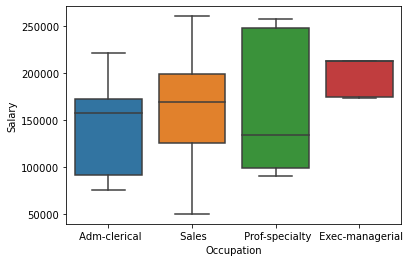

In [181]:
# Getting insights from the boxplot on mean salary across Occupation levels
sns.boxplot(x=df.Occupation,y=df.Salary)

In [22]:
MultiComp = MultiComparison(df.Salary,df.Occupation)
result = MultiComp.tukeyhsd()
print(result)

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
     group1           group2        meandiff  p-adj     lower        upper    reject
------------------------------------------------------------------------------------
    Adm-clerical  Exec-managerial     55693.3 0.4146  -40415.1459 151801.7459  False
    Adm-clerical   Prof-specialty  27528.8538 0.7252  -46277.4011 101335.1088  False
    Adm-clerical            Sales  16180.1167    0.9  -58951.3115  91311.5449  False
 Exec-managerial   Prof-specialty -28164.4462 0.8263 -120502.4542  64173.5618  False
 Exec-managerial            Sales -39513.1833 0.6507 -132913.8041  53887.4374  False
  Prof-specialty            Sales -11348.7372    0.9  -81592.6398  58895.1655  False
------------------------------------------------------------------------------------


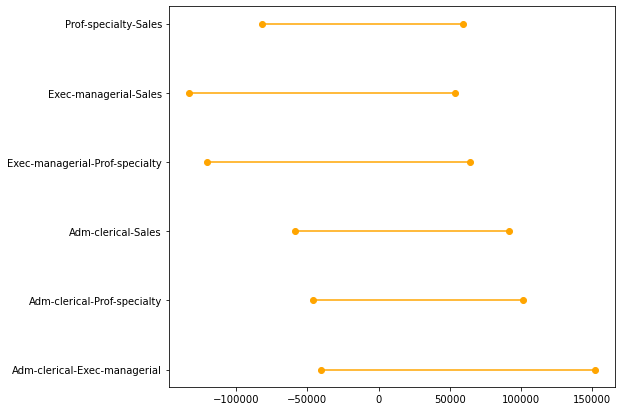

In [23]:
results = MultiComp.tukeyhsd()
df3=results.summary()
results_as_html = df3.as_html()
df4=pd.read_html(results_as_html, header=0, index_col=0)[0].reset_index()
groups = np.array([df4.group1+ '-'+ df4.group2])
plt.figure(figsize=(8,7))
data_dict = {}
data_dict['category'] = groups.ravel()
data_dict['lower'] = results.confint[:,0]
data_dict['upper'] = results.confint[:,1]
dataset = pd.DataFrame(data_dict)
for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(dataset))):
    plt.plot((lower,upper),(y,y),'ro-',color='orange')
    plt.yticks(range(len(dataset)),list(dataset['category']));

### Conclusion

For Occupation, we failed to reject the null hypothesis. The same can be understood from performing tukey hsd test.

We could see from the results of the Tukey Test that statistically, all levels of Occupation have same mean Salary which could also be noticed from the box plot above.

# 1.5 What is the interaction between the two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.

<AxesSubplot:xlabel='Occupation', ylabel='Salary'>

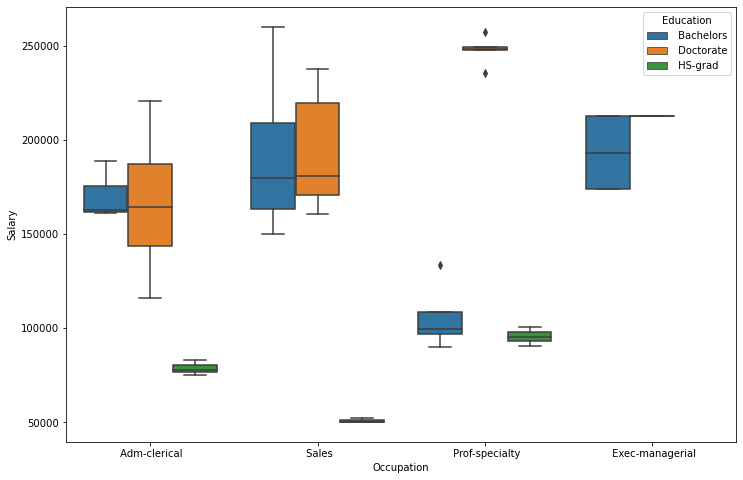

In [24]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df.Occupation, y=df.Salary, hue=df.Education)

<AxesSubplot:xlabel='Education', ylabel='Salary'>

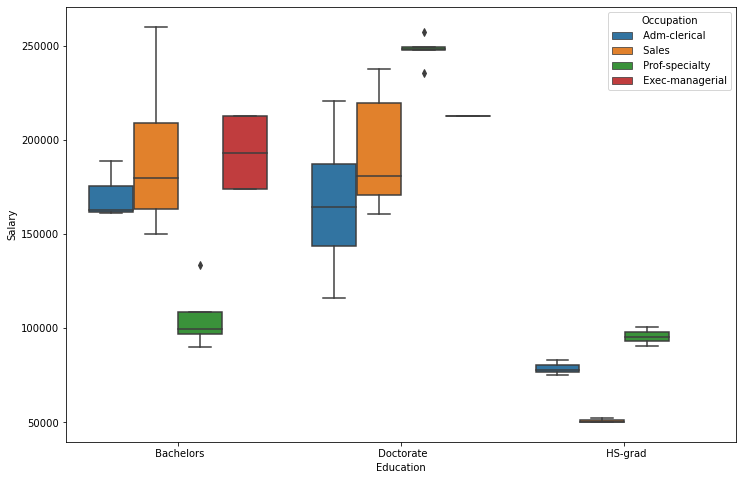

In [25]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df.Education, y=df.Salary, hue=df.Occupation)

<AxesSubplot:xlabel='Education', ylabel='Salary'>

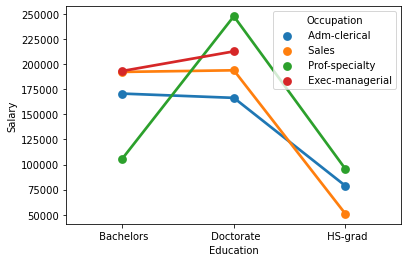

In [26]:
sns.pointplot(x=df.Education, y=df.Salary, hue=df.Occupation, ci=None)

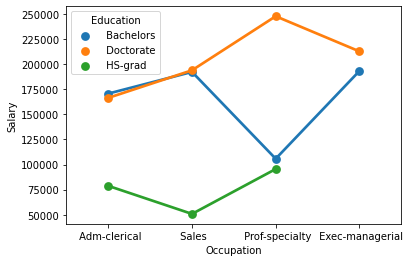

In [186]:
sns.pointplot(x=df.Occupation, y=df.Salary, hue=df.Education, ci=None)
plt.show()

# 1.6 Perform a two-way ANOVA based on the Education and Occupation (along with their interaction Education*Occupation) with the variable ‘Salary’. State the null and alternative hypotheses and state your results. How will you interpret this result?

## Framing the Hypothesis
### For Education Factor : 
    𝐻0: 𝜇1 = 𝜇2 = 𝜇3
    
    𝐻1: 𝑁𝑜𝑡 𝑎𝑙𝑙 𝜇𝑖 are equal
    
### For Occupation Factor : 
    𝐻0: 𝜇1 = 𝜇2 = 𝜇3 = 𝜇4
    
    𝐻1: 𝑁𝑜𝑡 𝑎𝑙𝑙 𝜇𝑖 are equal
    
### Interaction effects:
    𝐻0: 𝑇ℎ𝑒 𝑖𝑛𝑡𝑒𝑟𝑎𝑐𝑡𝑖𝑜𝑛 𝑒𝑓𝑓𝑒𝑐𝑡 𝑑𝑜𝑒𝑠 𝑛𝑜𝑡 𝑒𝑥𝑖𝑠𝑡
    
    𝐻1: 𝐴𝑛 𝑖𝑛𝑡𝑒𝑟𝑎𝑐𝑡𝑖𝑜𝑛 𝑒𝑓𝑓𝑒𝑐𝑡 𝑒𝑥𝑖𝑠𝑡

In [28]:
formula = 'Salary ~ C(Education) + C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq          F        PR(>F)
C(Education)    2.0  1.026955e+11  5.134773e+10  31.257677  1.981539e-08
C(Occupation)   3.0  5.519946e+09  1.839982e+09   1.120080  3.545825e-01
Residual       34.0  5.585261e+10  1.642724e+09        NaN           NaN


### Conclusion

From the above test, we can infer that the mean salaries are same across all the occupation levels, however, for atleast one pair of education level, the mean salaries are different.

In [29]:
formula = 'Salary ~ C(Education) + C(Occupation) + C(Education):C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                              df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN  


### Conclusion

Based on the above results, since the p-value is less than 0.05 for Education and Interaction, we reject the null hypothesis and since it is greater than 0.05 for Occupation, we fail to reject the null hypothesis. Hence, the mean salaries across all Occupation levels are same and different for at least one pair of Education level. Also, an interaction effect exists between Education & Occupation.

Due to the effect of interaction, we see the p-value for the occupation component has been greatly reduced, as can be seen from the findings above, and is now closer to 0.05. However, as it is still higher than 0.05, the mean incomes across all occupation levels are still seen as being similar.

# 1.7 Explain the business implications of performing ANOVA for this particular case study.

# PROBLEM 2
The dataset Education - Post 12th Standard.csv contains information on various colleges. You are expected to do a Principal Component Analysis for this case study according to the instructions given. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.

Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. 

What insight do you draw from the EDA?

Is scaling necessary for PCA in this case? Give justification and perform scaling.

Comment on the comparison between the covariance and the correlation matrices from this data [on scaled data].

Check the dataset for outliers before and after scaling. What insight do you derive here? [Please do not treat Outliers unless specifically asked to do so]

Extract the eigenvalues and eigenvectors.[Using Sklearn PCA Print Both]

Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features

Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]

Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]

In [2]:
df = pd.read_csv('Education+-+Post+12th+Standard.csv')

In [3]:
df.shape

(777, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [5]:
df.head().T

,0,1,2,3,4
Names,Abilene Christian University,Adelphi University,Adrian College,Agnes Scott College,Alaska Pacific University
Apps,1660,2186,1428,417,193
Accept,1232,1924,1097,349,146
Enroll,721,512,336,137,55
Top10perc,23,16,22,60,16
Top25perc,52,29,50,89,44
F.Undergrad,2885,2683,1036,510,249
P.Undergrad,537,1227,99,63,869
Outstate,7440,12280,11250,12960,7560
Room.Board,3300,6450,3750,5450,4120


In [6]:
df.Names.nunique()

777

### EDA

Since all of the variables are numeric, lets us plot histograms, boxplot and descriptive summary of these variables

# 2.1 Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?

### Univariate Analysis

In [7]:
def UnivariateAnalysis(column,nbins):
    print('\033[1m'+ "Description of " + column + '\033[0m' + '\n' )
    print(df[column].describe())
    print("----------------------------------------------------------------------------")
    
    
    plt.figure()
    print('\033[1m'+ "Distribution of " + column + '\033[0m' + '\n')
    sns.distplot(df[column], kde=True, color='g');
    plt.show()
    print("----------------------------------------------------------------------------")
    
    
    plt.figure()
    print('\033[1m'+ "BoxPlot of " + column + '\033[0m' + '\n')
    ax = sns.boxplot(x=df[column])
    plt.show()
    print("----------------------------------------------------------------------------")
    

In [8]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
column_names = list(df_num.columns)
len(column_names)

17

Description of Apps

count      777.000000
mean      3001.638353
std       3870.201484
min         81.000000
25%        776.000000
50%       1558.000000
75%       3624.000000
max      48094.000000
Name: Apps, dtype: float64
----------------------------------------------------------------------------
Distribution of Apps



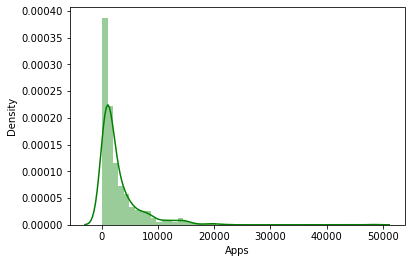

----------------------------------------------------------------------------
BoxPlot of Apps



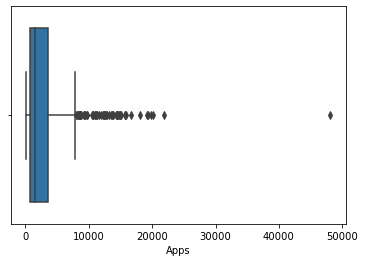

----------------------------------------------------------------------------
Description of Accept

count      777.000000
mean      2018.804376
std       2451.113971
min         72.000000
25%        604.000000
50%       1110.000000
75%       2424.000000
max      26330.000000
Name: Accept, dtype: float64
----------------------------------------------------------------------------
Distribution of Accept



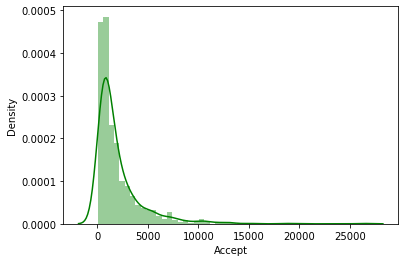

----------------------------------------------------------------------------
BoxPlot of Accept



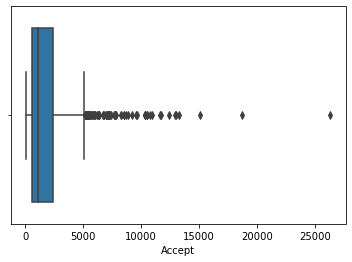

----------------------------------------------------------------------------
Description of Enroll

count     777.000000
mean      779.972973
std       929.176190
min        35.000000
25%       242.000000
50%       434.000000
75%       902.000000
max      6392.000000
Name: Enroll, dtype: float64
----------------------------------------------------------------------------
Distribution of Enroll



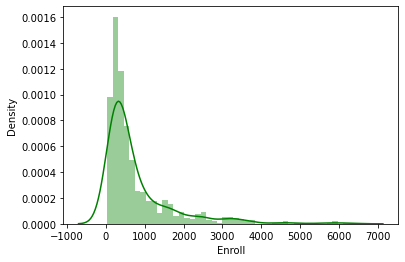

----------------------------------------------------------------------------
BoxPlot of Enroll



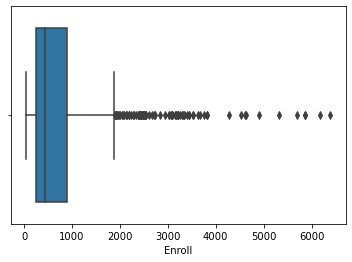

----------------------------------------------------------------------------
Description of Top10perc

count    777.000000
mean      27.558559
std       17.640364
min        1.000000
25%       15.000000
50%       23.000000
75%       35.000000
max       96.000000
Name: Top10perc, dtype: float64
----------------------------------------------------------------------------
Distribution of Top10perc



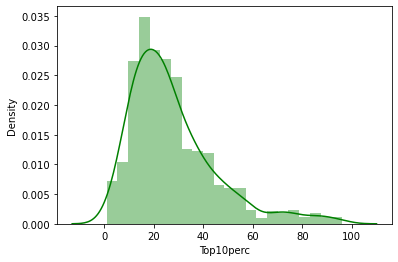

----------------------------------------------------------------------------
BoxPlot of Top10perc



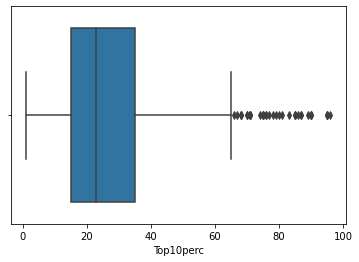

----------------------------------------------------------------------------
Description of Top25perc

count    777.000000
mean      55.796654
std       19.804778
min        9.000000
25%       41.000000
50%       54.000000
75%       69.000000
max      100.000000
Name: Top25perc, dtype: float64
----------------------------------------------------------------------------
Distribution of Top25perc



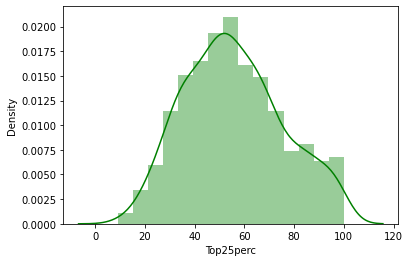

----------------------------------------------------------------------------
BoxPlot of Top25perc



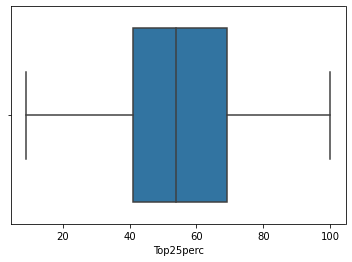

----------------------------------------------------------------------------
Description of F.Undergrad

count      777.000000
mean      3699.907336
std       4850.420531
min        139.000000
25%        992.000000
50%       1707.000000
75%       4005.000000
max      31643.000000
Name: F.Undergrad, dtype: float64
----------------------------------------------------------------------------
Distribution of F.Undergrad



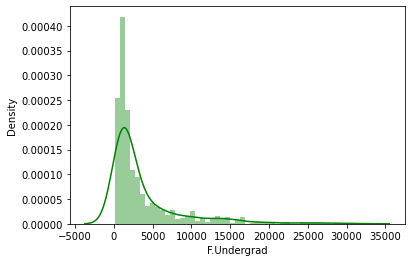

----------------------------------------------------------------------------
BoxPlot of F.Undergrad



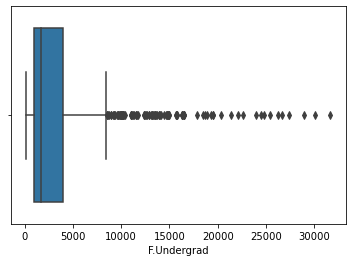

----------------------------------------------------------------------------
Description of P.Undergrad

count      777.000000
mean       855.298584
std       1522.431887
min          1.000000
25%         95.000000
50%        353.000000
75%        967.000000
max      21836.000000
Name: P.Undergrad, dtype: float64
----------------------------------------------------------------------------
Distribution of P.Undergrad



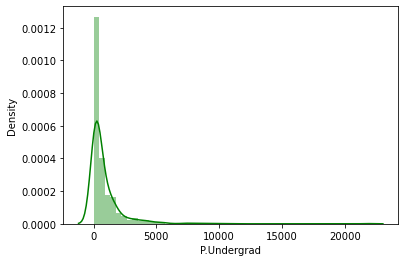

----------------------------------------------------------------------------
BoxPlot of P.Undergrad



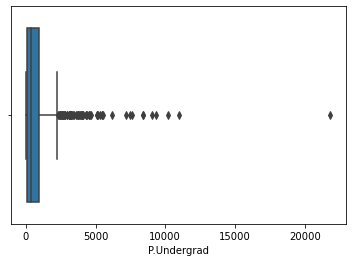

----------------------------------------------------------------------------
Description of Outstate

count      777.000000
mean     10440.669241
std       4023.016484
min       2340.000000
25%       7320.000000
50%       9990.000000
75%      12925.000000
max      21700.000000
Name: Outstate, dtype: float64
----------------------------------------------------------------------------
Distribution of Outstate



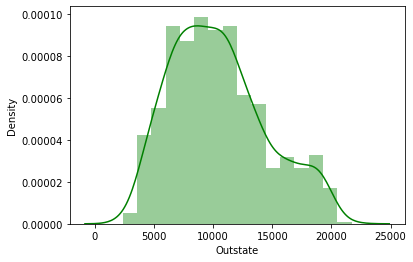

----------------------------------------------------------------------------
BoxPlot of Outstate



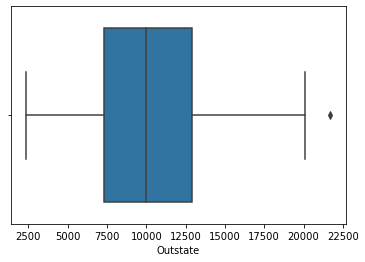

----------------------------------------------------------------------------
Description of Room.Board

count     777.000000
mean     4357.526384
std      1096.696416
min      1780.000000
25%      3597.000000
50%      4200.000000
75%      5050.000000
max      8124.000000
Name: Room.Board, dtype: float64
----------------------------------------------------------------------------
Distribution of Room.Board



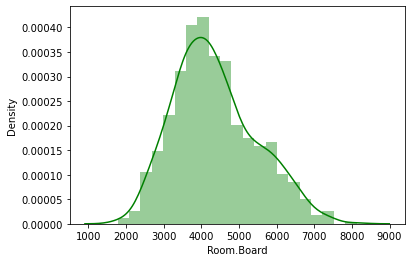

----------------------------------------------------------------------------
BoxPlot of Room.Board



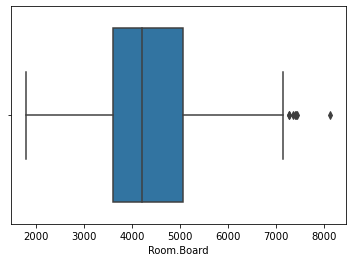

----------------------------------------------------------------------------
Description of Books

count     777.000000
mean      549.380952
std       165.105360
min        96.000000
25%       470.000000
50%       500.000000
75%       600.000000
max      2340.000000
Name: Books, dtype: float64
----------------------------------------------------------------------------
Distribution of Books



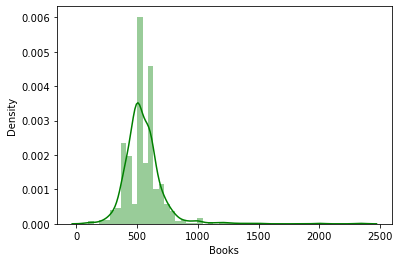

----------------------------------------------------------------------------
BoxPlot of Books



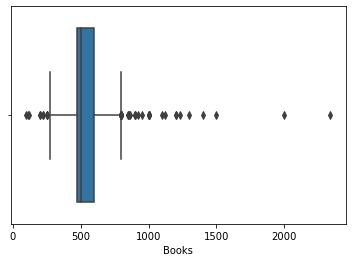

----------------------------------------------------------------------------
Description of Personal

count     777.000000
mean     1340.642214
std       677.071454
min       250.000000
25%       850.000000
50%      1200.000000
75%      1700.000000
max      6800.000000
Name: Personal, dtype: float64
----------------------------------------------------------------------------
Distribution of Personal



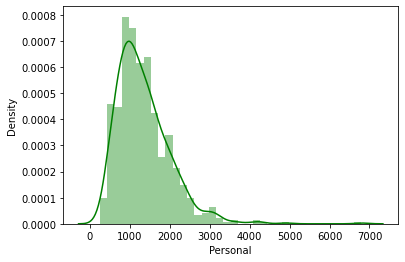

----------------------------------------------------------------------------
BoxPlot of Personal



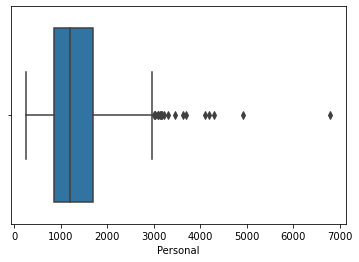

----------------------------------------------------------------------------
Description of PhD

count    777.000000
mean      72.660232
std       16.328155
min        8.000000
25%       62.000000
50%       75.000000
75%       85.000000
max      103.000000
Name: PhD, dtype: float64
----------------------------------------------------------------------------
Distribution of PhD



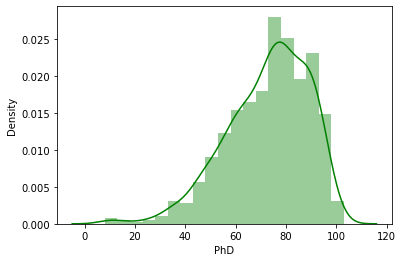

----------------------------------------------------------------------------
BoxPlot of PhD



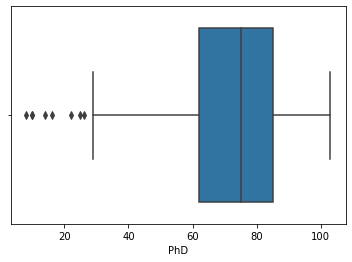

----------------------------------------------------------------------------
Description of Terminal

count    777.000000
mean      79.702703
std       14.722359
min       24.000000
25%       71.000000
50%       82.000000
75%       92.000000
max      100.000000
Name: Terminal, dtype: float64
----------------------------------------------------------------------------
Distribution of Terminal



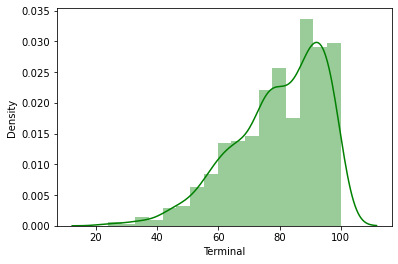

----------------------------------------------------------------------------
BoxPlot of Terminal



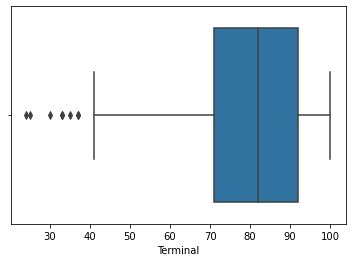

----------------------------------------------------------------------------
Description of S.F.Ratio

count    777.000000
mean      14.089704
std        3.958349
min        2.500000
25%       11.500000
50%       13.600000
75%       16.500000
max       39.800000
Name: S.F.Ratio, dtype: float64
----------------------------------------------------------------------------
Distribution of S.F.Ratio



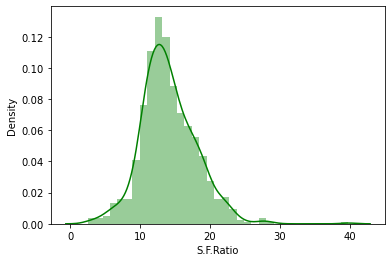

----------------------------------------------------------------------------
BoxPlot of S.F.Ratio



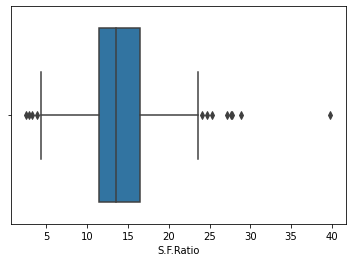

----------------------------------------------------------------------------
Description of perc.alumni

count    777.000000
mean      22.743887
std       12.391801
min        0.000000
25%       13.000000
50%       21.000000
75%       31.000000
max       64.000000
Name: perc.alumni, dtype: float64
----------------------------------------------------------------------------
Distribution of perc.alumni



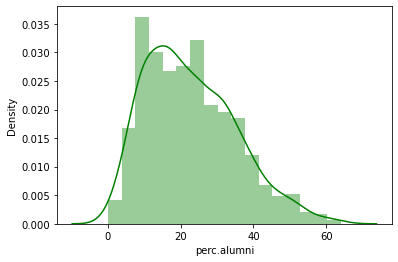

----------------------------------------------------------------------------
BoxPlot of perc.alumni



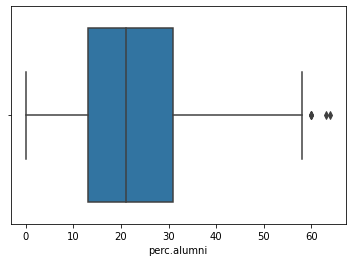

----------------------------------------------------------------------------
Description of Expend

count      777.000000
mean      9660.171171
std       5221.768440
min       3186.000000
25%       6751.000000
50%       8377.000000
75%      10830.000000
max      56233.000000
Name: Expend, dtype: float64
----------------------------------------------------------------------------
Distribution of Expend



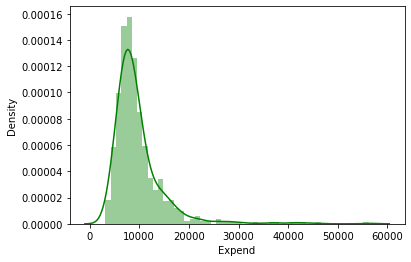

----------------------------------------------------------------------------
BoxPlot of Expend



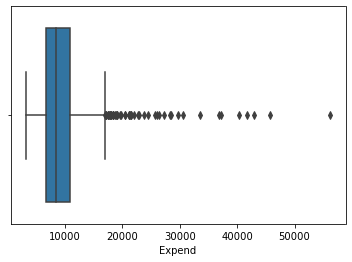

----------------------------------------------------------------------------
Description of Grad.Rate

count    777.00000
mean      65.46332
std       17.17771
min       10.00000
25%       53.00000
50%       65.00000
75%       78.00000
max      118.00000
Name: Grad.Rate, dtype: float64
----------------------------------------------------------------------------
Distribution of Grad.Rate



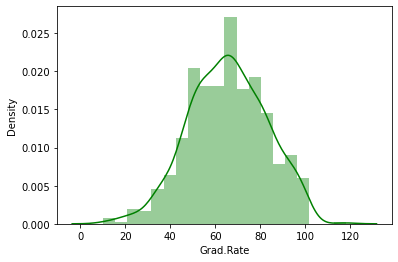

----------------------------------------------------------------------------
BoxPlot of Grad.Rate



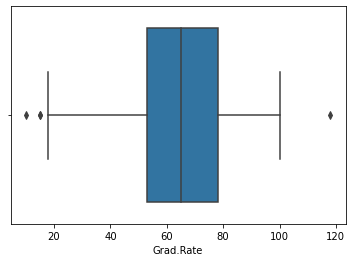

----------------------------------------------------------------------------


In [11]:
for column in column_names:
    UnivariateAnalysis(column,20)

In [9]:
No_of_colleges = df[df['Names'].str.contains('College')].shape[0]
No_of_universities = 777-No_of_colleges

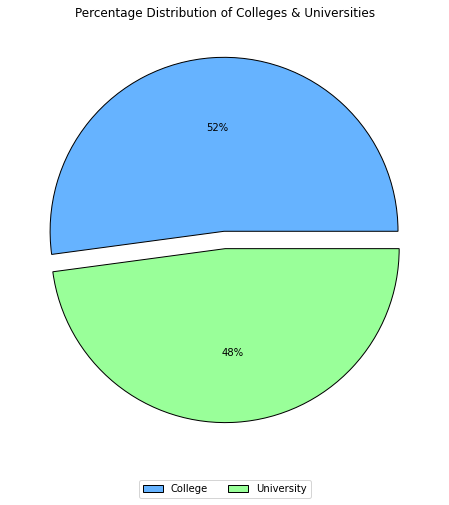

In [10]:
plt.figure(figsize=(12,8))
label=['College','University']
values=[No_of_colleges,No_of_universities]
plt.pie(x=values,explode=[0.05,0.05],autopct='%1.0f%%',colors=['#66b3ff','#99ff99'],wedgeprops=
       {'edgecolor':'black'})
plt.title('Percentage Distribution of Colleges & Universities')
plt.legend(labels=label, loc='upper center', 
           bbox_to_anchor=(0.5,-0.04), ncol=2)
plt.show()

### Bivariate analysis

In [11]:
corr = df_num.corr(method='pearson')

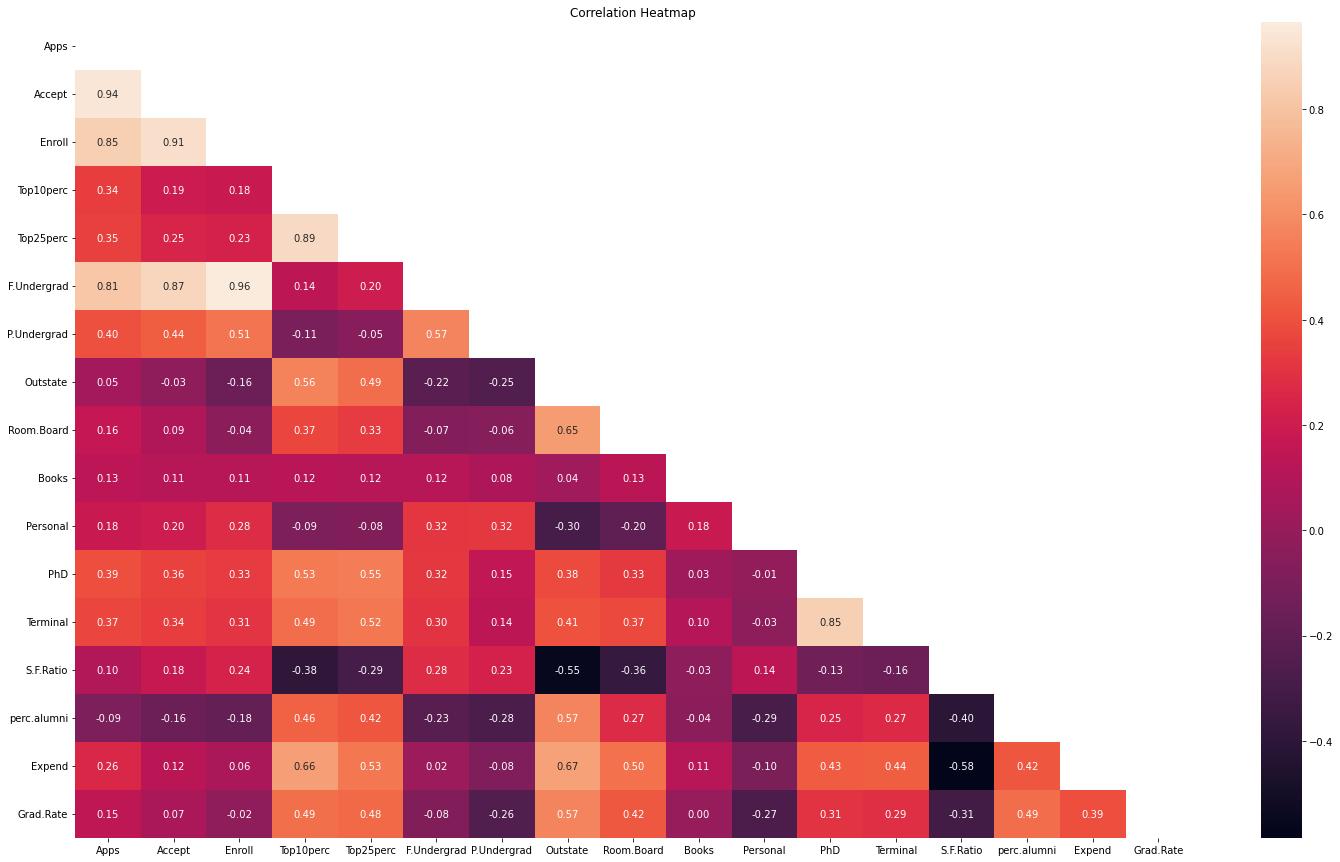

In [12]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(corr, annot=True,fmt='.2f',mask=mask)
plt.title('Correlation Heatmap')
plt.show()

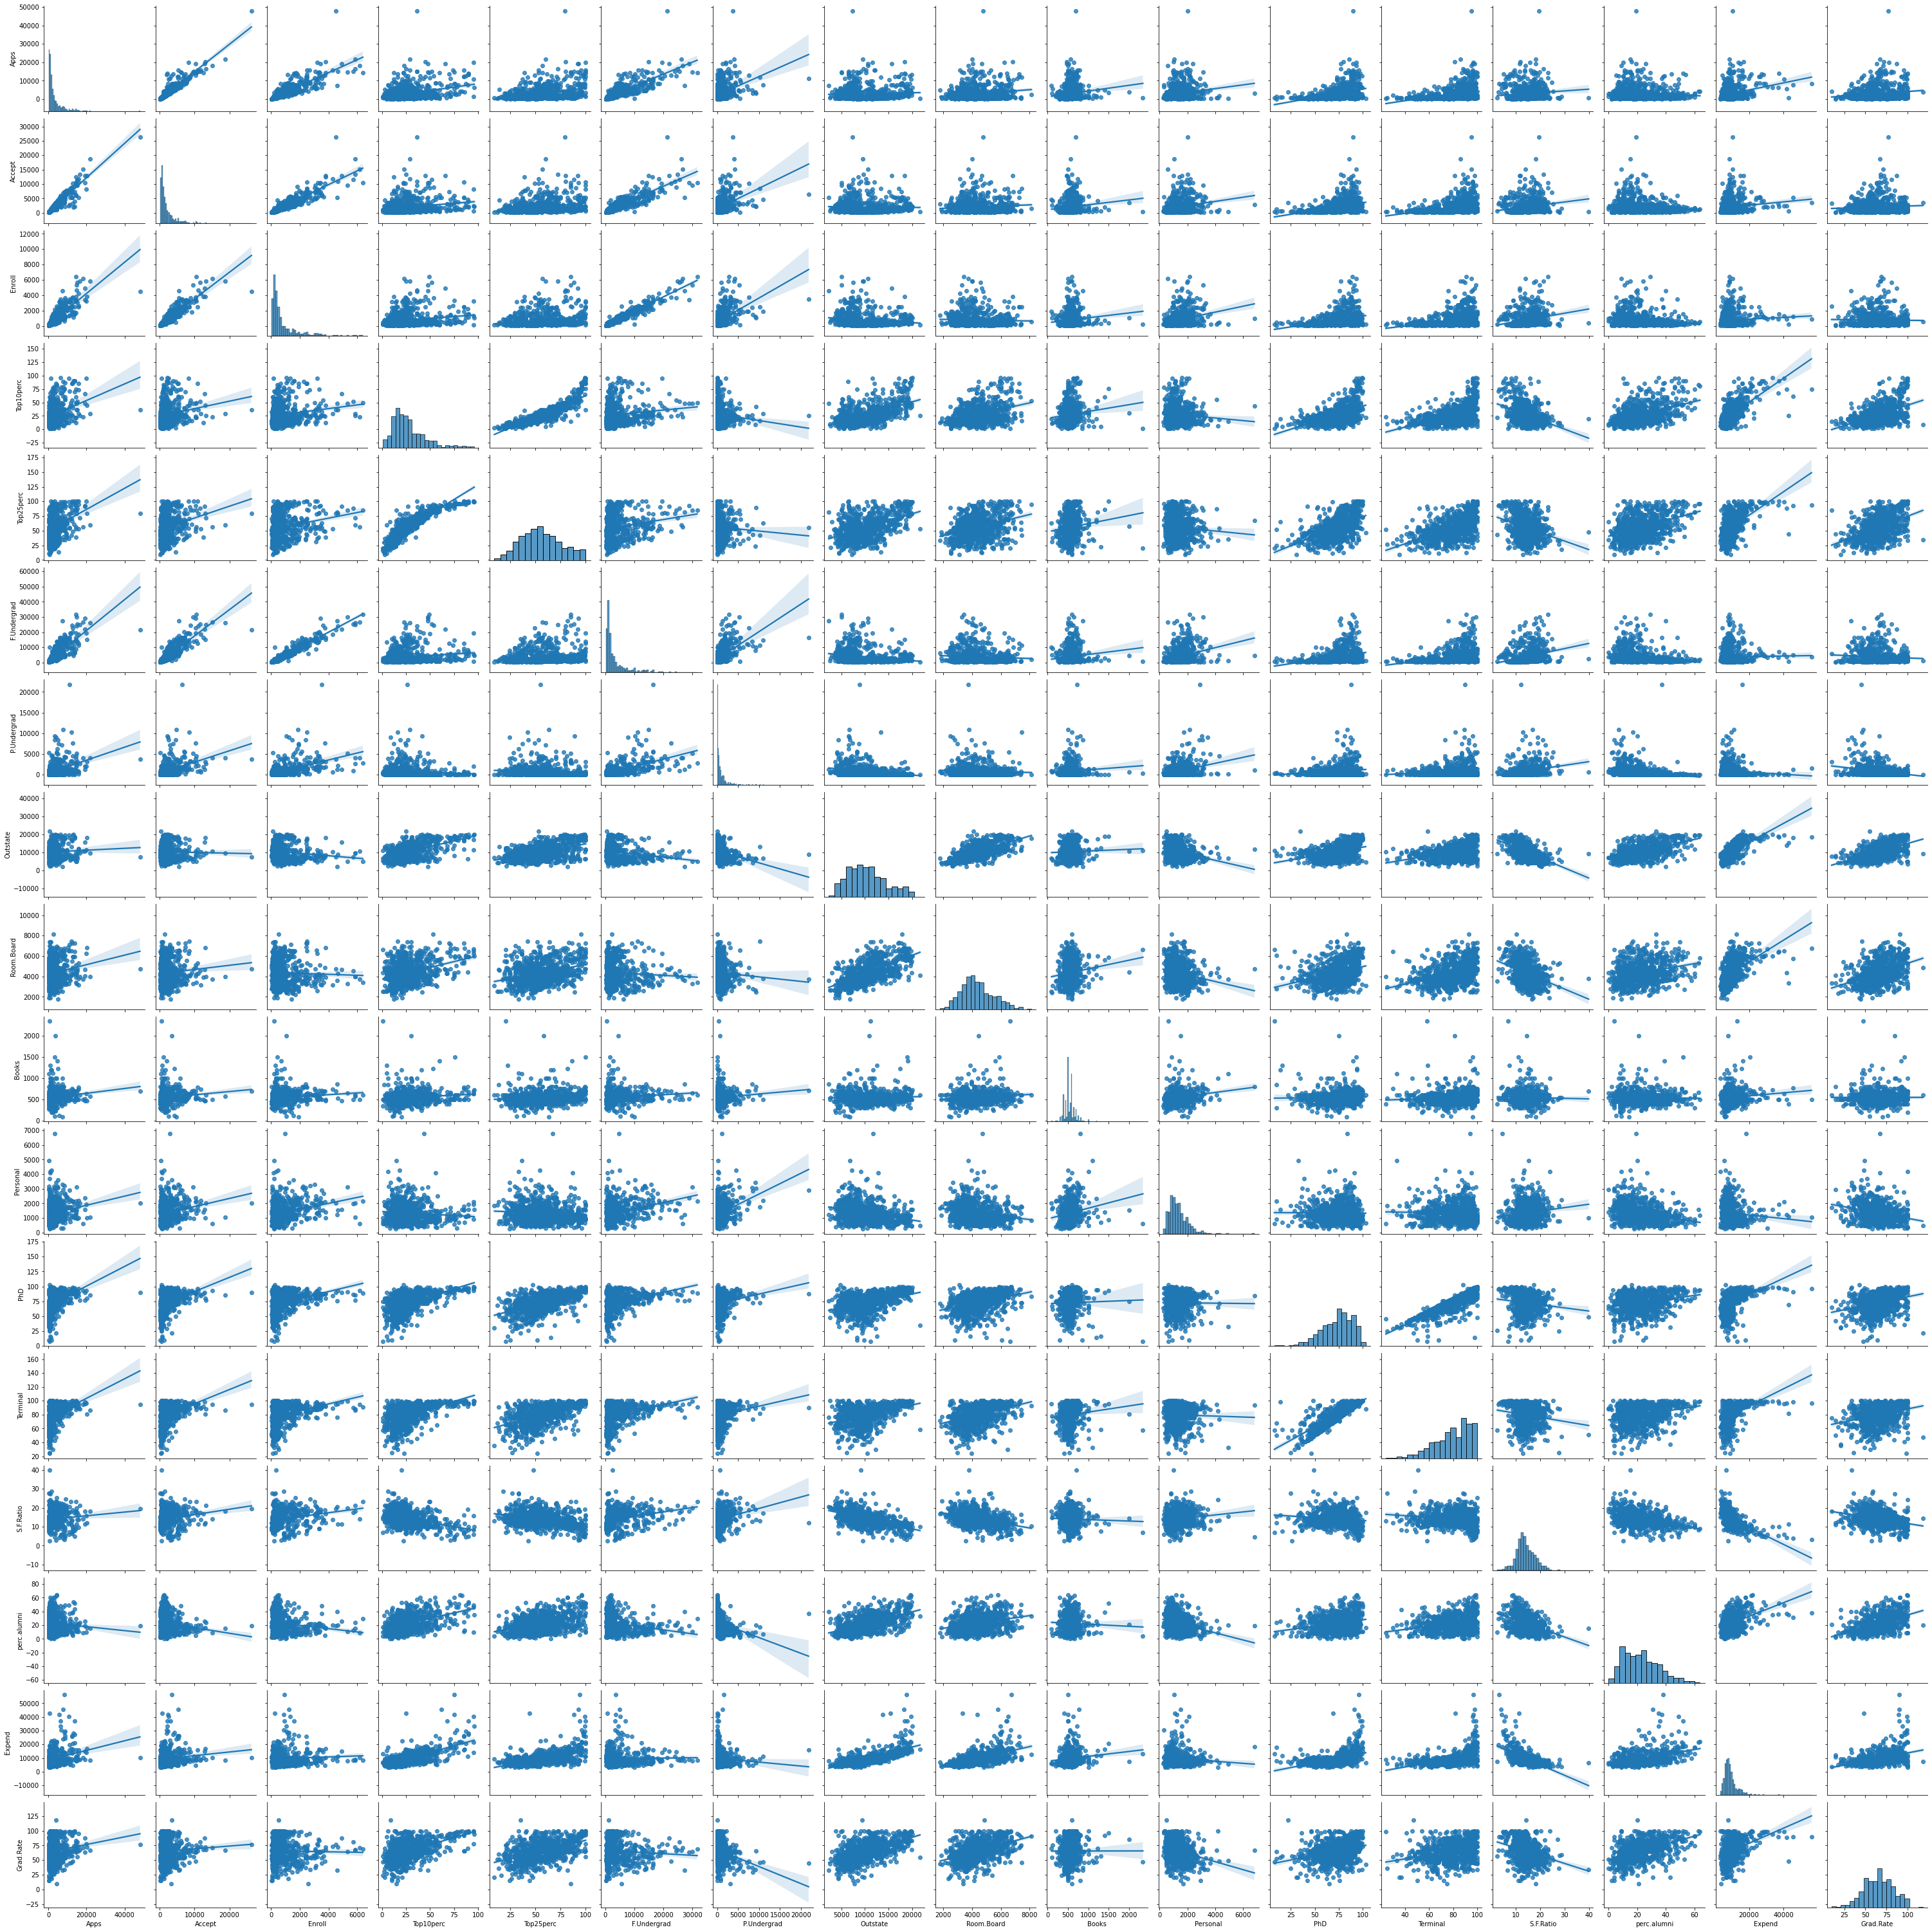

In [41]:
sns.pairplot(df_num,kind='reg')

# 2.2 Is scaling necessary for PCA in this case? Give justification and perform scaling.

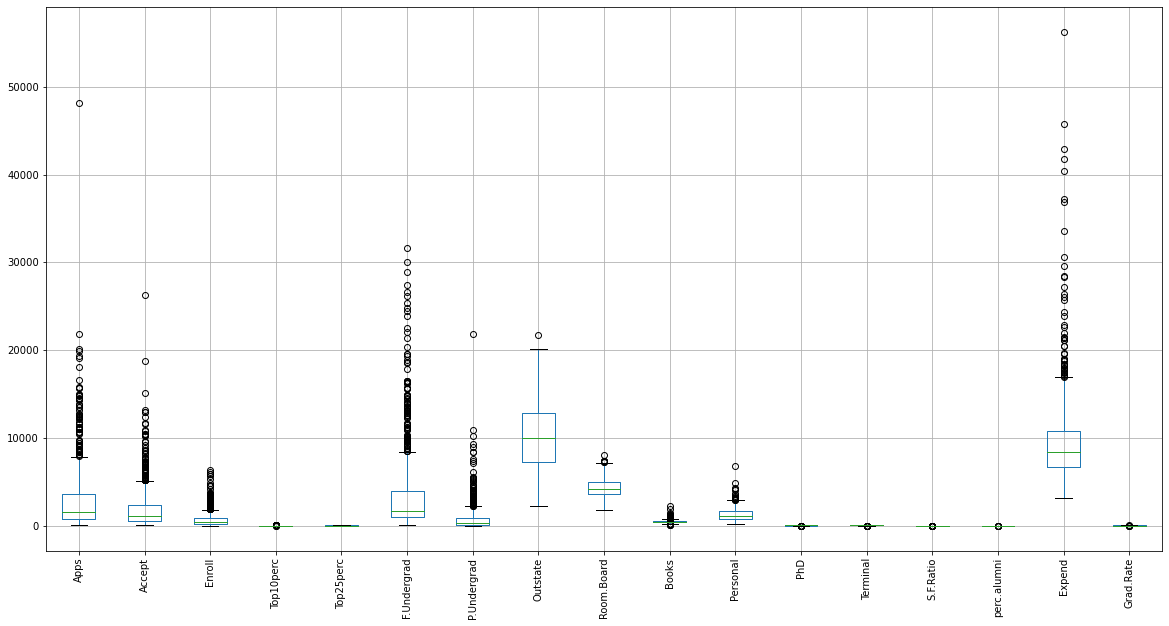

In [13]:
df_num.boxplot(figsize=(20,10))
plt.xticks(rotation=90)
plt.show()

### Since we have variables with different units of measurement, their scale of measurement differs from one another. Therefore, scaling of variables is neccessary.

In [14]:
from scipy.stats import zscore
df_num_scaled = df_num.apply(zscore)
df_num_scaled.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613


In [15]:
df_num_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Apps         777 non-null    float64
 1   Accept       777 non-null    float64
 2   Enroll       777 non-null    float64
 3   Top10perc    777 non-null    float64
 4   Top25perc    777 non-null    float64
 5   F.Undergrad  777 non-null    float64
 6   P.Undergrad  777 non-null    float64
 7   Outstate     777 non-null    float64
 8   Room.Board   777 non-null    float64
 9   Books        777 non-null    float64
 10  Personal     777 non-null    float64
 11  PhD          777 non-null    float64
 12  Terminal     777 non-null    float64
 13  S.F.Ratio    777 non-null    float64
 14  perc.alumni  777 non-null    float64
 15  Expend       777 non-null    float64
 16  Grad.Rate    777 non-null    float64
dtypes: float64(17)
memory usage: 103.3 KB


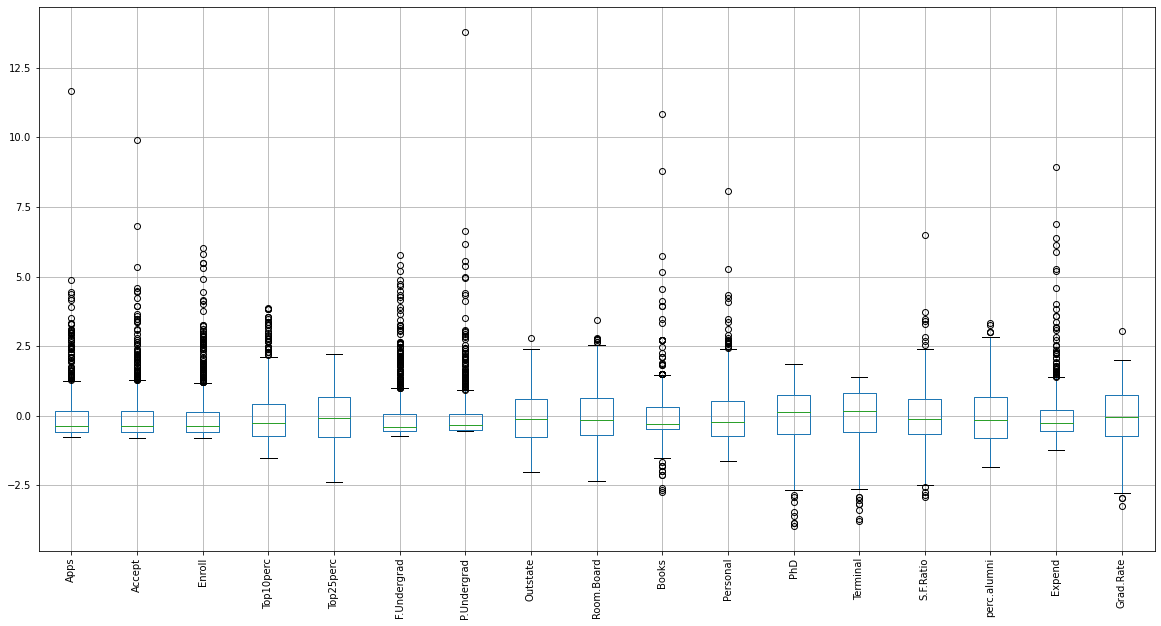

In [16]:
df_num_scaled.boxplot(figsize=(20,10))
plt.xticks(rotation=90)
plt.show()

# 2.3 Comment on the comparison between the covariance and the correlation matrices from this data.[on scaled data]

In [48]:
cov_matrix = df_num_scaled.cov()
cov_matrix

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.001289,0.944666,0.847913,0.339270,0.352093,0.815540,0.398777,0.050224,0.165152,0.132729,0.178961,0.391201,0.369968,0.095756,-0.090342,0.259927,0.146944
Accept,0.944666,1.001289,0.912811,0.192695,0.247795,0.875350,0.441839,-0.025788,0.091016,0.113672,0.201248,0.356216,0.338018,0.176456,-0.160196,0.124878,0.067399
Enroll,0.847913,0.912811,1.001289,0.181527,0.227037,0.965883,0.513730,-0.155678,-0.040284,0.112856,0.281291,0.331896,0.308671,0.237577,-0.181027,0.064252,-0.022370
Top10perc,0.339270,0.192695,0.181527,1.001289,0.893144,0.141471,-0.105492,0.563055,0.371959,0.119012,-0.093437,0.532513,0.491768,-0.385370,0.456072,0.661765,0.495627
Top25perc,0.352093,0.247795,0.227037,0.893144,1.001289,0.199702,-0.053646,0.490024,0.331917,0.115676,-0.080914,0.546566,0.525425,-0.295009,0.418403,0.528127,0.477896
F.Undergrad,0.815540,0.875350,0.965883,0.141471,0.199702,1.001289,0.571247,-0.216020,-0.068979,0.115699,0.317608,0.318747,0.300406,0.280064,-0.229758,0.018676,-0.078875
P.Undergrad,0.398777,0.441839,0.513730,-0.105492,-0.053646,0.571247,1.001289,-0.253839,-0.061405,0.081304,0.320294,0.149306,0.142086,0.232830,-0.281154,-0.083676,-0.257332
Outstate,0.050224,-0.025788,-0.155678,0.563055,0.490024,-0.216020,-0.253839,1.001289,0.655100,0.038905,-0.299472,0.383476,0.408509,-0.555536,0.566992,0.673646,0.572026
Room.Board,0.165152,0.091016,-0.040284,0.371959,0.331917,-0.068979,-0.061405,0.655100,1.001289,0.128128,-0.199685,0.329627,0.375022,-0.363095,0.272714,0.502386,0.425489
Books,0.132729,0.113672,0.112856,0.119012,0.115676,0.115699,0.081304,0.038905,0.128128,1.001289,0.179526,0.026940,0.100084,-0.031970,-0.040260,0.112554,0.001062


In [17]:
cor_matrix = df_num_scaled.corr()
cor_matrix

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


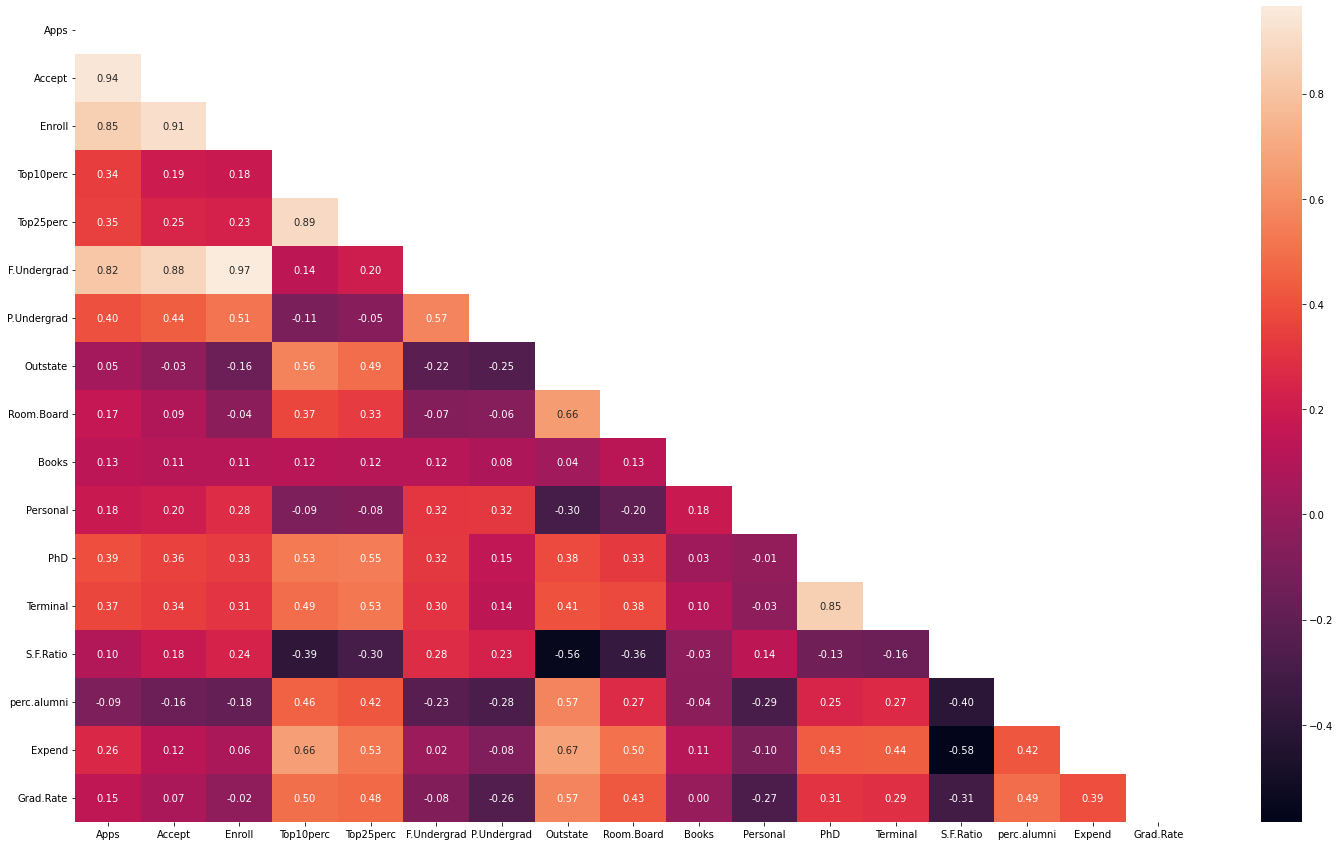

In [49]:
#Covariance matrix of scaled dataframe
mask = np.triu(np.ones_like(cov_matrix, dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(cov_matrix, annot=True,fmt='.2f',mask=mask)
plt.show()

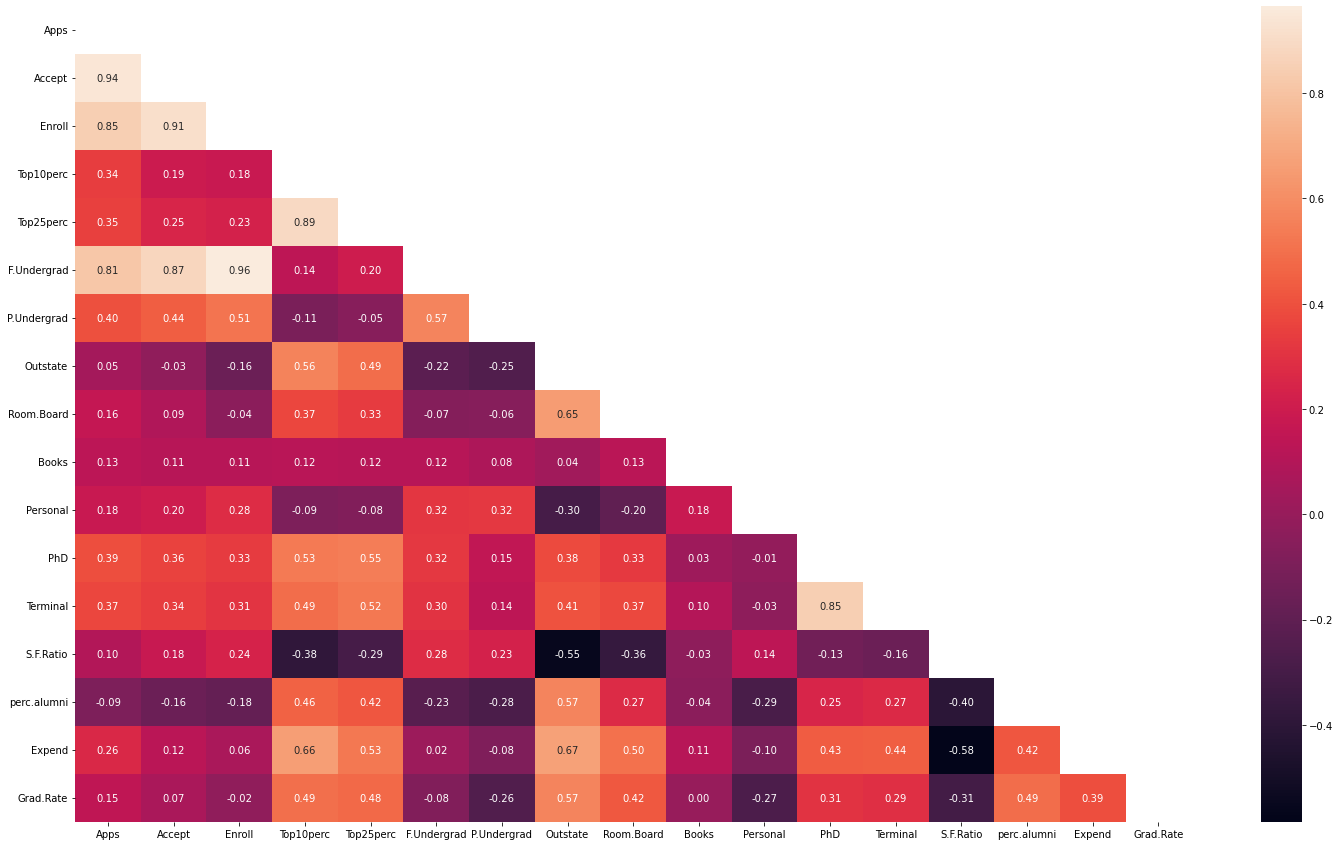

In [50]:
#Correlation matrix of scaled dataframe
corr = df_num.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(corr, annot=True,fmt='.2f',mask=mask)
plt.show()

### Inference

The covariance matrix and correlation matrix of scaled dataframe are similar to each other. 

# 2.4 Check the dataset for outliers before and after scaling. What insight do you derive here?

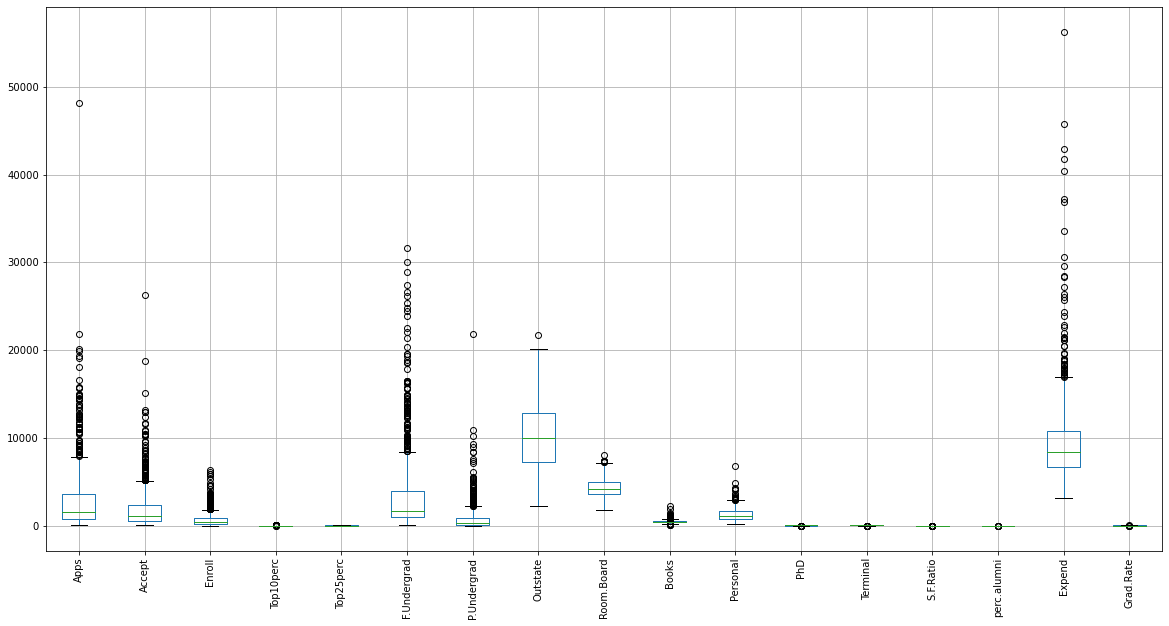

In [51]:
#Box plot of the dataset before scaling
df_num.boxplot(figsize=(20,10))
plt.xticks(rotation=90)
plt.show()

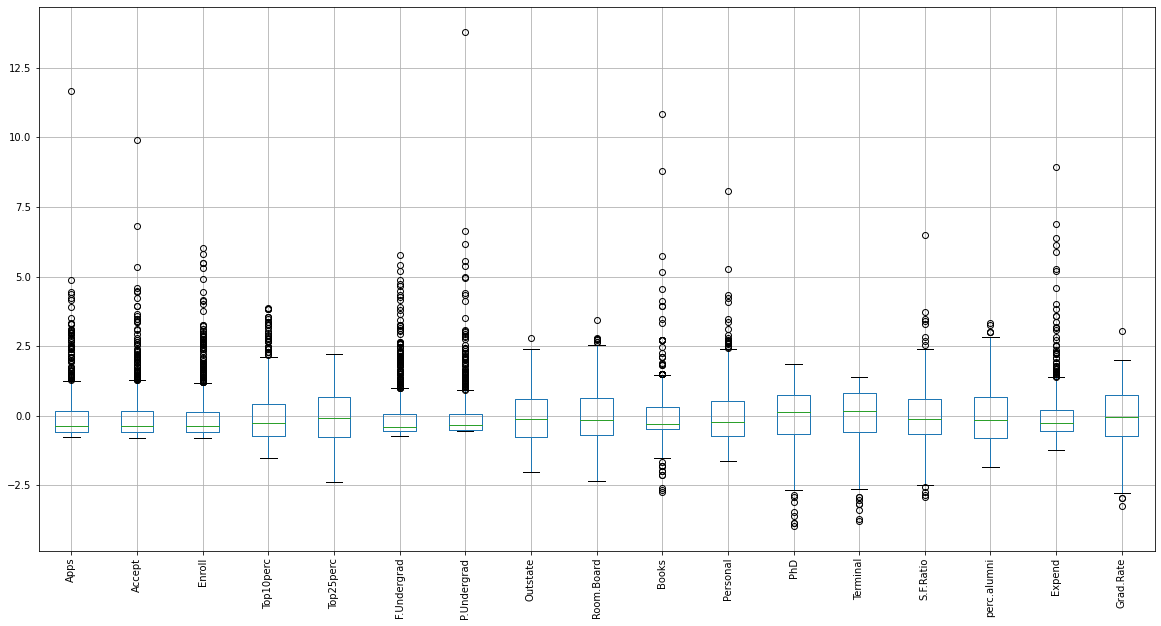

In [52]:
#Box plot of the dataset after scaling
df_num_scaled.boxplot(figsize=(20,10))
plt.xticks(rotation=90)
plt.show()

# 2.5 Extract the eigenvalues and eigenvectors. [Using Sklearn PCA Print Both]

In [90]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_num_scaled)
p_value

0.0

In [91]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_num_scaled)
kmo_model

0.8131251200373526

In [92]:
df_num_scaled.shape

(777, 17)

In [117]:
# Using scikit learn PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=17, random_state=123)
df_pca = pca.fit_transform(df_num_scaled)

In [94]:
#Eigen vectors
print("Eigen Vectors")
print(pca.components_)

Eigen Vectors
[[ 2.48765602e-01  2.07601502e-01  1.76303592e-01  3.54273947e-01
   3.44001279e-01  1.54640962e-01  2.64425045e-02  2.94736419e-01
   2.49030449e-01  6.47575181e-02 -4.25285386e-02  3.18312875e-01
   3.17056016e-01 -1.76957895e-01  2.05082369e-01  3.18908750e-01
   2.52315654e-01]
 [ 3.31598227e-01  3.72116750e-01  4.03724252e-01 -8.24118211e-02
  -4.47786551e-02  4.17673774e-01  3.15087830e-01 -2.49643522e-01
  -1.37808883e-01  5.63418434e-02  2.19929218e-01  5.83113174e-02
   4.64294477e-02  2.46665277e-01 -2.46595274e-01 -1.31689865e-01
  -1.69240532e-01]
 [-6.30921033e-02 -1.01249056e-01 -8.29855709e-02  3.50555339e-02
  -2.41479376e-02 -6.13929764e-02  1.39681716e-01  4.65988731e-02
   1.48967389e-01  6.77411649e-01  4.99721120e-01 -1.27028371e-01
  -6.60375454e-02 -2.89848401e-01 -1.46989274e-01  2.26743985e-01
  -2.08064649e-01]
 [ 2.81310530e-01  2.67817346e-01  1.61826771e-01 -5.15472524e-02
  -1.09766541e-01  1.00412335e-01 -1.58558487e-01  1.31291364e-01
   1.

In [95]:
#Eigen Values
print("Eigen Values")
print(pca.explained_variance_)

Eigen Values
[5.45052162 4.48360686 1.17466761 1.00820573 0.93423123 0.84849117
 0.6057878  0.58787222 0.53061262 0.4043029  0.31344588 0.22061096
 0.16779415 0.1439785  0.08802464 0.03672545 0.02302787]


# 2.6 Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features

In [96]:
pca.explained_variance_

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222, 0.53061262, 0.4043029 ,
       0.31344588, 0.22061096, 0.16779415, 0.1439785 , 0.08802464,
       0.03672545, 0.02302787])

In [97]:
#Check the explained variance for each PC
var_exp = pca.explained_variance_ratio_
var_exp

array([0.32020628, 0.26340214, 0.06900917, 0.05922989, 0.05488405,
       0.04984701, 0.03558871, 0.03453621, 0.03117234, 0.02375192,
       0.01841426, 0.01296041, 0.00985754, 0.00845842, 0.00517126,
       0.00215754, 0.00135284])

In [98]:
#Calculating the cumulative sum of explained variance
cumulative = var_exp.cumsum()
cumulative

array([0.32020628, 0.58360843, 0.65261759, 0.71184748, 0.76673154,
       0.81657854, 0.85216726, 0.88670347, 0.91787581, 0.94162773,
       0.96004199, 0.9730024 , 0.98285994, 0.99131837, 0.99648962,
       0.99864716, 1.        ])

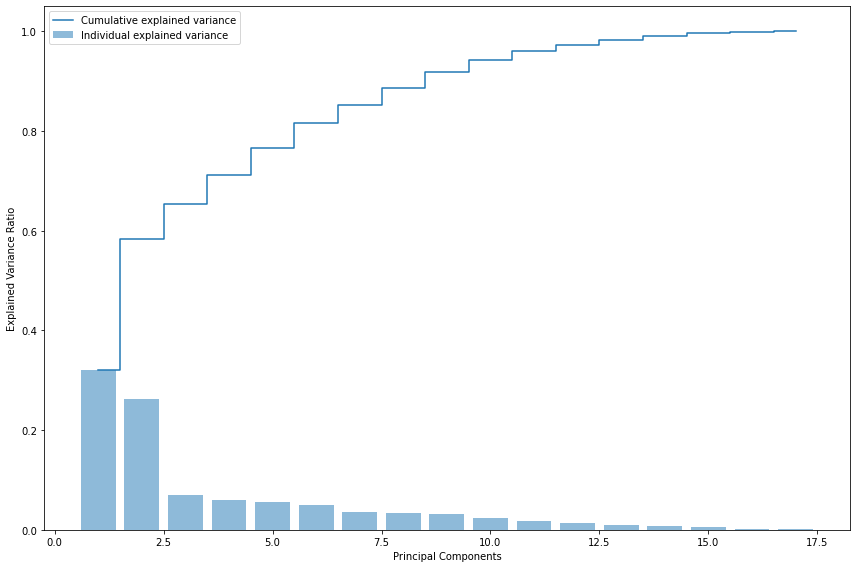

In [99]:
# Ploting 
plt.figure(figsize=(12 , 8))
plt.bar(range(1, len(var_exp) + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, len(var_exp) + 1), cumulative, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

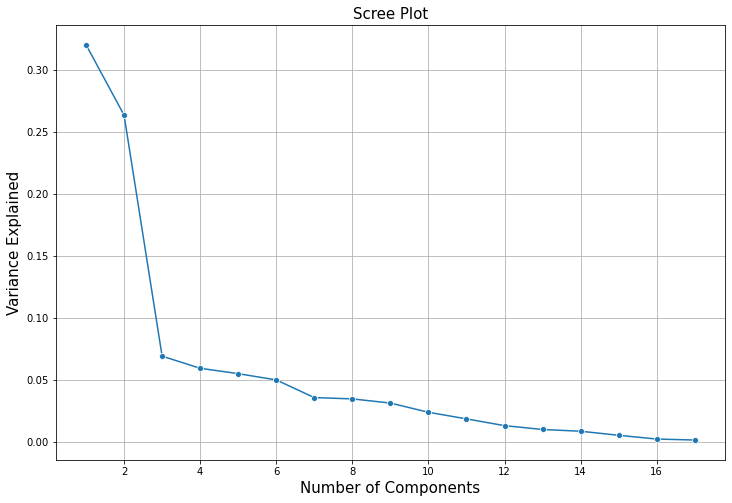

In [100]:
# Scree plot
plt.figure(figsize=(12,8))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

<Figure size 864x576 with 0 Axes>

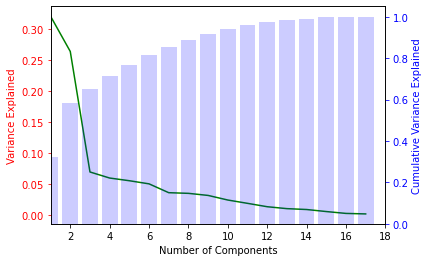

In [101]:
#Plotting the scree plot and Cumulative sum in a single plot
plt.figure(figsize=(12,8))
xaxis = range(1,len(pca.components_)+1)
fig, ax = plt.subplots() 
ax.plot(xaxis, pca.explained_variance_ratio_, color='green') 
ax.set_xlabel('Number of Components') 
ax.set_ylabel('Variance Explained', color='red')
ax.set_xlim(1,len(pca.components_)+1)
ax.tick_params(axis='y',colors='red')

ax2 = ax.twinx() 
ax2.bar(xaxis, cumulative, alpha=0.2, color='blue') 
ax2.set_ylabel('Cumulative Variance Explained', color='blue')
ax2.tick_params(axis='y',colors='blue')
plt.show()

In [63]:
# From the above results we can see that, first 6 PC's contribute to 81% of the variance in the dataset.
# So let us take 6 PC

In [64]:
# Using scikit learn PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=6, random_state=123)
df_pca = pca.fit_transform(df_num_scaled)
pca.components_

array([[ 0.2487656 ,  0.2076015 ,  0.17630359,  0.35427395,  0.34400128,
         0.15464096,  0.0264425 ,  0.29473642,  0.24903045,  0.06475752,
        -0.04252854,  0.31831287,  0.31705602, -0.17695789,  0.20508237,
         0.31890875,  0.25231565],
       [ 0.33159823,  0.37211675,  0.40372425, -0.08241182, -0.04477866,
         0.41767377,  0.31508783, -0.24964352, -0.13780888,  0.05634184,
         0.21992922,  0.05831132,  0.04642945,  0.24666528, -0.24659527,
        -0.13168986, -0.16924053],
       [-0.06309209, -0.10124907, -0.08298558,  0.03505553, -0.02414794,
        -0.06139296,  0.13968171,  0.04659888,  0.14896739,  0.67741165,
         0.49972112, -0.12702837, -0.06603755, -0.2898484 , -0.14698927,
         0.22674398, -0.20806465],
       [ 0.28131052,  0.26781736,  0.16182679, -0.05154725, -0.10976654,
         0.10041231, -0.15855849,  0.13129136,  0.18499599,  0.08708922,
        -0.23071057, -0.53472483, -0.51944302, -0.16118949,  0.01731422,
         0.0792735 

In [66]:
df_pca_loading = pd.DataFrame(pca.components_,columns=list(df_num_scaled))
df_pca_loading.shape

(6, 17)

In [71]:
df_pca_loading.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Apps         6 non-null      float64
 1   Accept       6 non-null      float64
 2   Enroll       6 non-null      float64
 3   Top10perc    6 non-null      float64
 4   Top25perc    6 non-null      float64
 5   F.Undergrad  6 non-null      float64
 6   P.Undergrad  6 non-null      float64
 7   Outstate     6 non-null      float64
 8   Room.Board   6 non-null      float64
 9   Books        6 non-null      float64
 10  Personal     6 non-null      float64
 11  PhD          6 non-null      float64
 12  Terminal     6 non-null      float64
 13  S.F.Ratio    6 non-null      float64
 14  perc.alumni  6 non-null      float64
 15  Expend       6 non-null      float64
 16  Grad.Rate    6 non-null      float64
dtypes: float64(17)
memory usage: 944.0 bytes


In [72]:
#Required Dataframe
df_pca_loading

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.248766,0.207602,0.176304,0.354274,0.344001,0.154641,0.026443,0.294736,0.249030,0.064758,-0.042529,0.318313,0.317056,-0.176958,0.205082,0.318909,0.252316
1,0.331598,0.372117,0.403724,-0.082412,-0.044779,0.417674,0.315088,-0.249644,-0.137809,0.056342,0.219929,0.058311,0.046429,0.246665,-0.246595,-0.131690,-0.169241
2,-0.063092,-0.101249,-0.082986,0.035056,-0.024148,-0.061393,0.139682,0.046599,0.148967,0.677412,0.499721,-0.127028,-0.066038,-0.289848,-0.146989,0.226744,-0.208065
3,0.281311,0.267817,0.161827,-0.051547,-0.109767,0.100412,-0.158558,0.131291,0.184996,0.087089,-0.230711,-0.534725,-0.519443,-0.161189,0.017314,0.079273,0.269129
4,0.005741,0.055786,-0.055694,-0.395434,-0.426534,-0.043454,0.302385,0.222532,0.560919,-0.127289,-0.222311,0.140166,0.204720,-0.079388,-0.216297,0.075958,-0.109268
5,-0.016237,0.007535,-0.042558,-0.052693,0.033092,-0.043454,-0.191199,-0.030000,0.162755,0.641055,-0.331398,0.091256,0.154928,0.487046,-0.047340,-0.298119,0.216163


# 2.7 Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]

In [77]:
df_linear_comb = round(df_pca_loading,2)
df_linear_comb.T

,0,1,2,3,4,5
Apps,0.25,0.33,-0.06,0.28,0.01,-0.02
Accept,0.21,0.37,-0.10,0.27,0.06,0.01
Enroll,0.18,0.40,-0.08,0.16,-0.06,-0.04
Top10perc,0.35,-0.08,0.04,-0.05,-0.40,-0.05
Top25perc,0.34,-0.04,-0.02,-0.11,-0.43,0.03
F.Undergrad,0.15,0.42,-0.06,0.10,-0.04,-0.04
P.Undergrad,0.03,0.32,0.14,-0.16,0.30,-0.19
Outstate,0.29,-0.25,0.05,0.13,0.22,-0.03
Room.Board,0.25,-0.14,0.15,0.18,0.56,0.16
Books,0.06,0.06,0.68,0.09,-0.13,0.64


In [78]:
#This can be used to express the first PC as a linear combination of features and eigen vectors
df_linear_comb.loc['0':'0',:]

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.25,0.21,0.18,0.35,0.34,0.15,0.03,0.29,0.25,0.06,-0.04,0.32,0.32,-0.18,0.21,0.32,0.25


PC1=(0.25*Apps)+ (0.21*Accept)+ (0.18*Enroll)+ (0.35*Top10perc)+ (0.34*Top25perc)+ (0.15*F.Undergrad)+ (0.03*P.Undergrad)+ (0.29*Outstate)+ (0.25*Room.Board)+ (0.06*Books)+ (-0.04*Personal)+ (0.32*PhD)+ (0.32*Terminal)+ (-0.18*S.F.Ratio)+ (0.21*perc.alumni)+ (0.32*Expend)+ (0.25*Grad.Rate)

# 2.8 Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

In [82]:
#explained variance for each PC
var_exp

array([0.32020628, 0.26340214, 0.06900917, 0.05922989, 0.05488405,
       0.04984701, 0.03558871, 0.03453621, 0.03117234, 0.02375192,
       0.01841426, 0.01296041, 0.00985754, 0.00845842, 0.00517126,
       0.00215754, 0.00135284])

In [85]:
#cumulative sum of explained variance
print("Cumulative Variance Explained ")
print(cumulative)

Cumulative Variance Explained 
[0.32020628 0.58360843 0.65261759 0.71184748 0.76673154 0.81657854
 0.85216726 0.88670347 0.91787581 0.94162773 0.96004199 0.9730024
 0.98285994 0.99131837 0.99648962 0.99864716 1.        ]


# 2.9 Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]

In [141]:
# From the above results we can see that, first 5 PC's contribute to 75% of the variance in the dataset.
# So let us take 5 PC

In [134]:
# Using scikit learn PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=6, random_state=123)
df_pca = pca.fit_transform(df_num_scaled)
pca.components_

array([[ 0.2487656 ,  0.2076015 ,  0.17630359,  0.35427395,  0.34400128,
         0.15464096,  0.0264425 ,  0.29473642,  0.24903045,  0.06475752,
        -0.04252854,  0.31831287,  0.31705602, -0.17695789,  0.20508237,
         0.31890875,  0.25231565],
       [ 0.33159823,  0.37211675,  0.40372425, -0.08241182, -0.04477866,
         0.41767377,  0.31508783, -0.24964352, -0.13780888,  0.05634184,
         0.21992922,  0.05831132,  0.04642945,  0.24666528, -0.24659527,
        -0.13168986, -0.16924053],
       [-0.06309209, -0.10124907, -0.08298558,  0.03505553, -0.02414794,
        -0.06139296,  0.13968171,  0.04659888,  0.14896739,  0.67741165,
         0.49972112, -0.12702837, -0.06603755, -0.2898484 , -0.14698927,
         0.22674398, -0.20806465],
       [ 0.28131052,  0.26781736,  0.16182679, -0.05154725, -0.10976654,
         0.10041231, -0.15855849,  0.13129136,  0.18499599,  0.08708922,
        -0.23071057, -0.53472483, -0.51944302, -0.16118949,  0.01731422,
         0.0792735 

In [135]:
df_pca_loading = pd.DataFrame(pca.components_,columns=list(df_num_scaled))
df_pca_loading.shape

(6, 17)

In [136]:
df_pca_loading.head(8)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.248766,0.207602,0.176304,0.354274,0.344001,0.154641,0.026443,0.294736,0.249030,0.064758,-0.042529,0.318313,0.317056,-0.176958,0.205082,0.318909,0.252316
1,0.331598,0.372117,0.403724,-0.082412,-0.044779,0.417674,0.315088,-0.249644,-0.137809,0.056342,0.219929,0.058311,0.046429,0.246665,-0.246595,-0.131690,-0.169241
2,-0.063092,-0.101249,-0.082986,0.035056,-0.024148,-0.061393,0.139682,0.046599,0.148967,0.677412,0.499721,-0.127028,-0.066038,-0.289848,-0.146989,0.226744,-0.208065
3,0.281311,0.267817,0.161827,-0.051547,-0.109767,0.100412,-0.158558,0.131291,0.184996,0.087089,-0.230711,-0.534725,-0.519443,-0.161189,0.017314,0.079273,0.269129
4,0.005741,0.055786,-0.055694,-0.395434,-0.426534,-0.043454,0.302385,0.222532,0.560919,-0.127289,-0.222311,0.140166,0.204720,-0.079388,-0.216297,0.075958,-0.109268
5,-0.016237,0.007535,-0.042558,-0.052693,0.033092,-0.043454,-0.191199,-0.030000,0.162755,0.641055,-0.331398,0.091256,0.154928,0.487046,-0.047340,-0.298119,0.216163


In [137]:
from matplotlib.patches import Rectangle

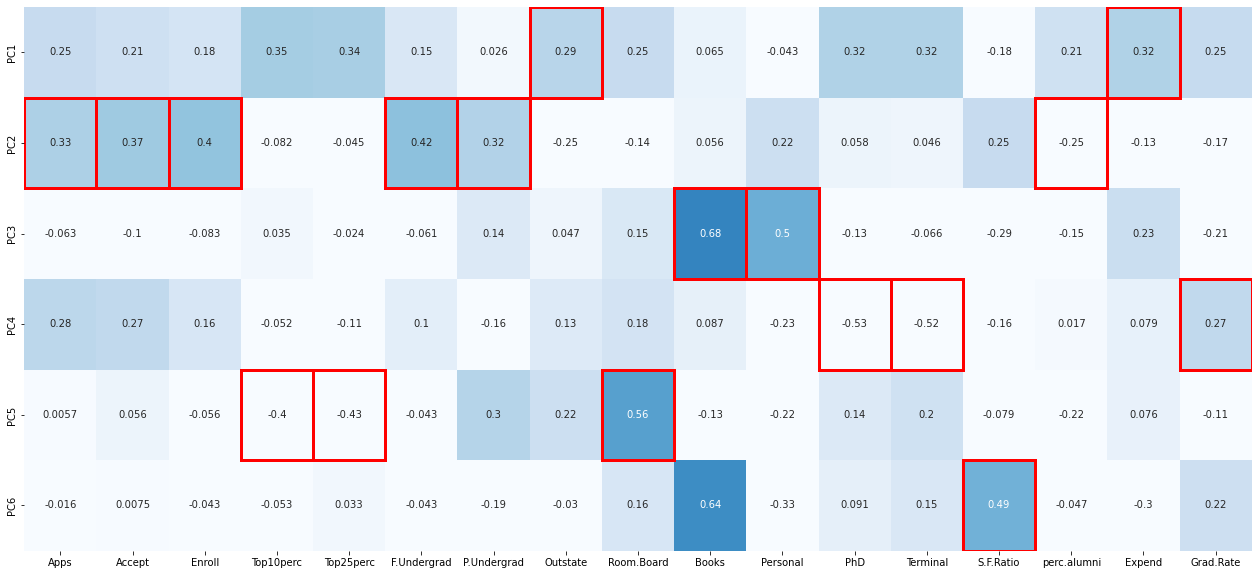

In [138]:
fig,ax = plt.subplots(figsize=(22, 10), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_pca_loading, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC1','PC2','PC3','PC4','PC5','PC6'])

column_max = df_pca_loading.abs().idxmax(axis=0)

for col, variable in enumerate(df_pca_loading.columns):
    position = df_pca_loading.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

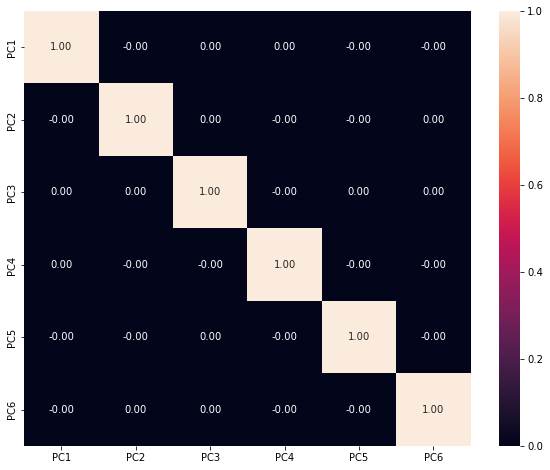

In [142]:
#reduction of multicollinearity
pca_final_df = pd.DataFrame(df_pca, columns = ['PC1','PC2','PC3','PC4','PC5','PC6'])
pca_final_df.head(10)
#Check for presence of correlations among teh PCs
plt.figure(figsize = (10,8))
sns.heatmap(pca_final_df.corr(), annot=True,fmt='.2f');